# Dataset Mask Detector

This dataset will contain 3 directories:
- correctly-masked
- uncorrectly-masked
- not-masked

### correctly-masked
This directory will contain n images of people correctly wearing a face mask, with a name from 0 to n

### uncorrectly-masked
This directory will contain n images of people uncorrectly wearing a face mask, with a name from 0 to n

### not-masked
This directory will contain n images of people not wearing at all a face mask, with a name from 0 to n

Be sure that each of these directories will contain approximately the same number of examples

## Data available

Currently we have 2 data sources:
- with-without.zip
- incorrectly_masked.zip

### with-without.zip
This archive contains a directory called Dataset with 2 subdirectories: 
- with_mask: containing 5522 images
- without_mask: containing 5522 images

### incorrectly_masked.zip
This archive contains 35 subdirectories, with a name from 00000 to 34000, each containing about 950 images, for a total of 33589 examples

In [1]:
import os
import cv2
import shutil
import PIL
import random
from pathlib import Path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
BASE_DIR = '../../dataset/'
#NO_MASK_DIR = BASE_DIR + 'Dataset/without_mask/'
NO_MASK_DIR = BASE_DIR + 'no_mask/'
#CORRECT_MASK_DIR = BASE_DIR + 'Dataset/with_mask/'
#UNCORRECT_MASK_DIR = BASE_DIR + 'incorrectly_masked/'
#ALT_CORRECT_MASK_DIR = BASE_DIR + 'correctly_masked/'
DATASET_DIR = BASE_DIR + 'dataset_nuovo/'
DATA_DIR = Path(DATASET_DIR)
IMG_HEIGHT = 256
IMG_WIDTH = 256

In [3]:
# make destination directory and subdirectories if not already exist
Path(DATASET_DIR).mkdir(parents=True, exist_ok=True)
Path(DATASET_DIR+'not-masked').mkdir(parents=True, exist_ok=True)
Path(DATASET_DIR+'correctly-masked').mkdir(parents=True, exist_ok=True)
Path(DATASET_DIR+'uncorrectly-masked').mkdir(parents=True, exist_ok=True)
# copy images from source directories to final directory
[shutil.copy(NO_MASK_DIR+image, DATASET_DIR+'not-masked/') for image in os.listdir(NO_MASK_DIR)]
# in order to have the same number of images, only 7 subdirectories will go
#for subdir in os.listdir(UNCORRECT_MASK_DIR)[1:7]:
#    full_subdir = UNCORRECT_MASK_DIR + subdir + '/'
#    [shutil.copy(full_subdir+image, DATASET_DIR+'uncorrectly-masked/') for image in os.listdir(full_subdir)]
#for subdir in os.listdir(ALT_CORRECT_MASK_DIR)[1:7]:
#    full_subdir = ALT_CORRECT_MASK_DIR + subdir + '/'
#    [shutil.copy(full_subdir+image, DATASET_DIR+'correctly-masked/') for image in os.listdir(full_subdir)]

['../../dataset/dataset_nuovo/not-masked/real_00251.jpg',
 '../../dataset/dataset_nuovo/not-masked/real_00537.jpg',
 '../../dataset/dataset_nuovo/not-masked/real_00523.jpg',
 '../../dataset/dataset_nuovo/not-masked/real_00245.jpg',
 '../../dataset/dataset_nuovo/not-masked/easy_143_0011.jpg',
 '../../dataset/dataset_nuovo/not-masked/mid_329_1110.jpg',
 '../../dataset/dataset_nuovo/not-masked/real_00279.jpg',
 '../../dataset/dataset_nuovo/not-masked/real_00292.jpg',
 '../../dataset/dataset_nuovo/not-masked/mid_257_1111.jpg',
 '../../dataset/dataset_nuovo/not-masked/real_00286.jpg',
 '../../dataset/dataset_nuovo/not-masked/mid_40_1111.jpg',
 '../../dataset/dataset_nuovo/not-masked/mid_41_1111.jpg',
 '../../dataset/dataset_nuovo/not-masked/hard_91_1100.jpg',
 '../../dataset/dataset_nuovo/not-masked/real_00735.jpg',
 '../../dataset/dataset_nuovo/not-masked/real_00053.jpg',
 '../../dataset/dataset_nuovo/not-masked/hard_90_1100.jpg',
 '../../dataset/dataset_nuovo/not-masked/real_00047.jpg',
 

In [5]:
def convert_images_to_jpeg(s_dir, img_width, img_height):
    s_list= os.listdir(s_dir)
    for klass in s_list:
        klass_path=os.path.join (s_dir, klass)
        print ('processing class directory ', klass)
        if os.path.isdir(klass_path):
            file_list=os.listdir(klass_path)
            for f in file_list:               
                f_path=os.path.join(klass_path,f)
                index=f_path.rfind('.')
                f_path_no_ext=f_path[:index].lower()
                img = Image.open(f_path)
                img = img.convert('RGB')
                newsize = (img_width, img_height)
                img = img.resize(newsize)
                img.save(f_path_no_ext+'.jpeg')

def remove_jpg(s_dir):
    s_list= os.listdir(s_dir)
    for clazz in s_list:
        clazz_path=os.path.join(s_dir, clazz)
        print(clazz_path)
        [os.remove(clazz_path+'/'+image) for image in os.listdir(clazz_path) if (clazz_path+'/'+image).endswith('.jpg')]

source_dir =r"{}".format(DATASET_DIR)
convert_images_to_jpeg(source_dir, IMG_WIDTH, IMG_HEIGHT)
remove_jpg(source_dir)

../../dataset/dataset_nuovo/correctly-masked
../../dataset/dataset_nuovo/not-masked
../../dataset/dataset_nuovo/uncorrectly-masked


In [ ]:
corr_mask_images = list(DATA_DIR.glob("correctly-masked/*"))
PIL.Image.open(str(corr_mask_images[random.randint(0, len(corr_mask_images))]))

In [ ]:
uncorr_mask_images = list(DATA_DIR.glob("uncorrectly-masked/*"))
PIL.Image.open(str(uncorr_mask_images[random.randint(0, len(uncorr_mask_images))]))

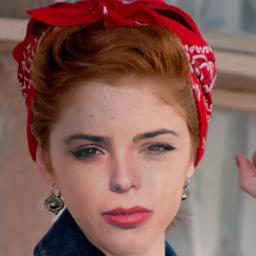

In [42]:
no_mask_images = list(DATA_DIR.glob("not-masked/*"))
PIL.Image.open(str(no_mask_images[random.randint(0, len(no_mask_images))]))